In [19]:
from pyvi import ViTokenizer, ViPosTagger
def remove_pattern(row_content):
    return re.sub('[\d\%\,\.\:\\\/\(\)\!\?\&]+', '', row_content)
def tokenize(row_content):
    return ViTokenizer.tokenize(row_content)

In [20]:
import pandas as pd
import re

TextFileReader = pd.read_csv('final_tagged_reviews-fine.csv', chunksize=1000, sep=',')  # the number of rows per chunk

dfList = []
for df in TextFileReader:
    dfList.append(df)

df = pd.concat(dfList,sort=False)

In [21]:
df["Content"] = df["Content"].apply(remove_pattern)
df["Content"]= df["Content"].apply(tokenize)
# df["Content"] = df["Content"].apply(remove_pattern)
df = df.dropna()
df

,Content,Sentiment
0,Đúng như đại_sứ của bayo - MC Lê_Anh từng nói ...,1
1,Phong_cảnh chùa rất được,1
2,Hồ_thoáng mát đúng là biểu_tượng của Hà_nội,1
3,Là điểm đến để có_thể cảm_nhận được nét đa văn...,1
4,Xây_dựng trên núi đá_vôi vẫn giữ được nét cổ t...,1
5,Khung_cảnh đặc_trưng chưa bị pha_tạp Ngồi trên...,1
6,Không_khí thoáng mát gió trời thật tuyệt,1
7,Biển đẹp buổi tối ở bãi biển rất tấp_nập quán_...,1
8,Đem lại cảm_giác thanh_bình_yên_ả và chút hoài...,1
9,Rất dễ_chịu và thú_vị mát_mẻ,1


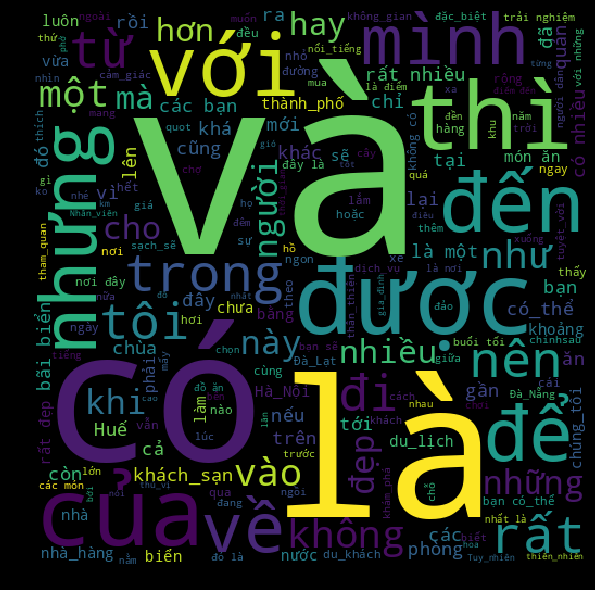

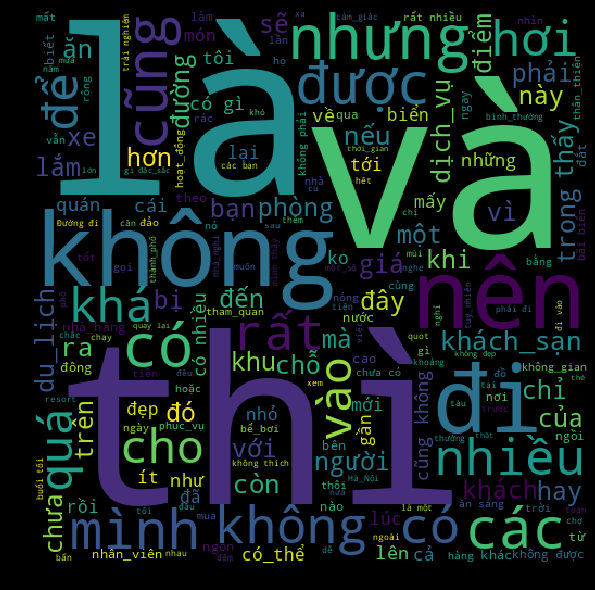

In [25]:
# visualizing data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
%matplotlib inline
review_words = ' '.join(list(df[df['Sentiment']==1]['Content']))
review_wc = WordCloud(width=512, height=512).generate(review_words)
plt.figure(figsize = (10,8), facecolor='k')
plt.imshow(review_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
review_words = ' '.join(list(df[df['Sentiment']==0]['Content']))
review_wc = WordCloud(width=512, height=512).generate(review_words)
plt.figure(figsize = (10,8), facecolor='k')
plt.imshow(review_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
reviews = []
for review in df["Content"].values:
    reviews.append(review)
# print(reviews)
stop_words = set(['để', 'thì', 'là','đi','bộ','ai','bên', 'anh', 'bài', 'ba', 'bao', 'mà', 'của', 'trong', 'mình', 'gì', 'những', 'lại', 'và', 'amp', 'quot', 'sẽ', 'phút', 'gì_đó', 'các'])
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stop_words, min_df=2, max_df=0.5, max_features=10000)
X = vectorizer.fit_transform(reviews)
# print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
print(X.shape)

['advise', 'advise bạn', 'an', 'an buổi', 'an_bình', 'an_ninh', 'an_toàn', 'and', 'angkor', 'angkor wat', 'angkor_thom', 'angkor_wat', 'anh_chàng', 'anh_chị', 'anh_em', 'anh_hùng', 'ao', 'atk', 'atr', 'atr từ', 'ba_chỉ', 'ba_lô', 'bagan', 'bagan có', 'bagan_đồ', 'baht', 'bali', 'bali xứng_đáng', 'ban', 'ban_công', 'ban_ngày', 'ban_tặng', 'ban_đêm', 'ban_đầu', 'bangkok', 'bangkok không', 'bao_bọc', 'bao_bọc bởi', 'bao_cấp', 'bao_giờ', 'bao_gồm', 'bao_gồm cả', 'bao_la', 'bao_nhiêu', 'bao_nhiêu người', 'bao_phủ', 'bao_quát', 'bar', 'bar việt', 'bath', 'bay', 'bay tới', 'bay từ', 'bayon', 'bbq', 'bia', 'bia huda', 'bia lạnh', 'biếc', 'biến', 'biến mất', 'biết', 'biết bơi', 'biết có', 'biết mặc_cả', 'biết nhiều', 'biết nhưng', 'biết rằng', 'biết thêm', 'biết đây', 'biết đó', 'biết đến', 'biết_bao', 'biết_bao_nhiêu', 'biển', 'biển bãi', 'biển bạn', 'biển cha_am', 'biển chỉ', 'biển chỉ_dẫn', 'biển con', 'biển cách', 'biển cát', 'biển có', 'biển cô', 'biển cũng', 'biển dài', 'biển gần', 'biển 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib
import pickle

import pandas
import re

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, df['Sentiment'], test_size=0.1, random_state=69)  
# X_train_tfidf.toarray()
y_train_tfidf
clf = GaussianNB().fit(X_train_tfidf.toarray(), y_train_tfidf)
filename = 'NB_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [73]:
print(X_test_tfidf.shape)
# loaded_model = pickle.load(open("NB_model.sav", 'rb'))
# print(loaded_model)

y_pred = clf.predict(X_test_tfidf.toarray())

(167, 10000)


In [74]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_tfidf, y_pred))  
print(classification_report(y_test_tfidf, y_pred))  

[[ 13  36]
 [  8 110]]
              precision    recall  f1-score   support

           0       0.62      0.27      0.37        49
           1       0.75      0.93      0.83       118

   micro avg       0.74      0.74      0.74       167
   macro avg       0.69      0.60      0.60       167
weighted avg       0.71      0.74      0.70       167



In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# average_precision = average_precision_score(test['Sentiment'], y_score)
print(f1_score(y_test_tfidf, y_pred, average="macro"))
print(precision_score(y_test_tfidf, y_pred, average="macro"))
print(recall_score(y_test_tfidf, y_pred, average="macro"))    

0.6023809523809524
0.6862361382909328
0.598754756139744


In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_tfidf, y_pred))  

[[ 13  36]
 [  8 110]]


In [48]:
import numpy as np
print(np.mean(y_pred == y_test_tfidf))  

0.7365269461077845


In [35]:
def important_features(vectorizer,classifier,n=20):
    class_labels = classifier.classes_
    feature_names =vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    print("Important words in negative reviews")
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in positive reviews")
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat) 

In [51]:
# print(max(clf.theta_[0]))
a = clf.theta_[0]
# print(a.index(max(a))


In [52]:
print(a)

[0.         0.         0.         ... 0.         0.00112152 0.        ]


In [56]:
a1 = np.where(a==0.00112152)
print(a1)

(array([], dtype=int64),)


In [58]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_tfidf, y_train_tfidf)  
SVM_model = 'SVM_model.sav'
pickle.dump(svclassifier, open(SVM_model, 'wb'))

In [70]:
y_pred = svclassifier.predict(X_test_tfidf.toarray())

In [71]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_tfidf, y_pred))  
print(classification_report(y_test_tfidf, y_pred))  

[[ 39  10]
 [  6 112]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        49
           1       0.92      0.95      0.93       118

   micro avg       0.90      0.90      0.90       167
   macro avg       0.89      0.87      0.88       167
weighted avg       0.90      0.90      0.90       167



In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# average_precision = average_precision_score(test['Sentiment'], y_score)
print(f1_score(y_test_tfidf, y_pred, average="macro"))
print(precision_score(y_test_tfidf, y_pred, average="macro"))
print(recall_score(y_test_tfidf, y_pred, average="macro"))    

0.8815602836879433
0.8923497267759564
0.87253545485991


In [62]:
print(np.mean(y_pred == y_test_tfidf))  

0.9041916167664671


In [66]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_tfidf, y_train_tfidf)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
kNN_model = 'kNN_model.sav'
pickle.dump(classifier, open(kNN_model, 'wb'))

In [68]:
y_pred = svclassifier.predict(X_test_tfidf.toarray())

In [69]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test_tfidf, y_pred))  
print(classification_report(y_test_tfidf, y_pred))  


[[ 39  10]
 [  6 112]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        49
           1       0.92      0.95      0.93       118

   micro avg       0.90      0.90      0.90       167
   macro avg       0.89      0.87      0.88       167
weighted avg       0.90      0.90      0.90       167

